<a href="https://colab.research.google.com/github/prathameshpawar17/new_repository_1/blob/main/Image_Generation_using_Stable_Diffusion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Title and Introduction
======================
Image Manipulation with Stable Diffusion

This notebook covers:
- Exploring Stable Diffusion for text-to-image and image-to-image generation.
- Using Adapter Fusion to enhance model capabilities.
- Quantizing the Stable Diffusion model for efficiency.
- Implementing a background replacement feature with automated masking.




Model Selection
================
In this section, we will explore and compare Stable Diffusion models (v3 and v3.5).

Stable Diffusion 3:
- Supports text-to-image, image-to-image, and inpainting.
- Faster inference speed and lower resource requirements compared to v3.5.
- Suitable for applications with tight resource constraints.

Stable Diffusion 3.5:
- Improved image quality and better prompt understanding.
- Advanced inpainting capabilities.
- Slightly higher resource requirements.

Summary:
- If resource efficiency is critical, use Stable Diffusion 3.
- For superior image quality and enhanced features, use Stable Diffusion 3.5.




# Adapter Fusion
# ==============
# Adapters are used to enhance the Stable Diffusion model's capabilities, such as improving facial features or generating specific styles.

# Example: Using a style adapter with Stable Diffusion
# Install the required libraries (if not already installed)

In [1]:
#!pip install diffusers transformers accelerate

In [2]:
#!pip install --upgrade diffusers transformers accelerate


In [3]:
# Install necessary libraries
!pip install diffusers transformers accelerate
!pip install huggingface_hub torch torchvision

In [4]:
# Step 1: Import required libraries
import torch
from diffusers import StableDiffusionPipeline
from huggingface_hub import login
from PIL import Image

In [5]:
from google.colab import drive
drive.mount('/content/drive')

#!pip install huggingface_hub
# from huggingface_hub import login
# login()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
print("Please log in with your Hugging Face token.")
login()
print("Hugging Face token.")

Please log in with your Hugging Face token.


Hugging Face token.


In [7]:
# !pip install --upgrade diffusers transformers accelerate torch torchvision


In [8]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")


Using device: cuda


In [9]:
# Step 3: Log in to Hugging Face Hub
# from huggingface_hub import login
# print("Please log in with your Hugging Face token.")
# login()

In [10]:
# # Install required libraries
# #!pip install diffusers transformers huggingface_hub accelerate torch torchvision

# # # Authenticate with Hugging Face
# # from huggingface_hub import login
# # login()  # Enter your token when prompted

# # Import necessary libraries
# import torch
# from diffusers import StableDiffusionPipeline

# # Set device
# device = "cuda" if torch.cuda.is_available() else "cpu"
# print(f"Using device: {device}")

# # Use a valid model (Stable Diffusion)
# model_name = "stabilityai/stable-diffusion-3.5-medium"  # Replace with your desired model
# try:
#     pipe = StableDiffusionPipeline.from_pretrained(model_name, torch_dtype=torch.float16).to(device)
#     print("Model successfully loaded.")
# except Exception as e:
#     print(f"Error loading model: {e}")
#     print("Switching to CPU.")
#     pipe = StableDiffusionPipeline.from_pretrained(model_name, torch_dtype=torch.float16).to("cpu")

# # Generate an image
# prompt = "A beautiful landscape in Van Gogh style"
# result = pipe(prompt)

# # Extract and display the image
# image = result.images[0]
# image.show()

# print("Image generation complete!")


# # from diffusers import StableDiffusionPipeline
# # import torch

# # # Load Stable Diffusion model
# # model_name = "CompVis/stable-diffusion-v1-4"  # Replace with Stable Diffusion 3/3.5 if available

# # # Check GPU availability
# # device = "cuda" if torch.cuda.is_available() else "cpu"

# # try:
# #     # Use the correct torch.float32
# #     pipe = StableDiffusionPipeline.from_pretrained(model_name, torch_dtype=torch.float32).to(device)
# #     print(f"Model successfully loaded on {device}.")
# # except RuntimeError as e:
# #     print(f"Error: {e}")
# #     print("Switching to CPU as fallback.")
# #     pipe = StableDiffusionPipeline.from_pretrained(model_name, torch_dtype=torch.float32).to("cpu")
# #     print("Model successfully loaded on CPU.")

# # # Placeholder for adapter loading (requires an actual adapter)
# # # Note: If using a style adapter, ensure you have the correct model name and configuration
# # try:
# #     from diffusers import StableDiffusionAdapterPipeline  # Only include if adapters are supported
# #     adapter_name = "CompVis/stable-diffusion-v1-4"  # Replace with the actual adapter model name
# #     adapter = StableDiffusionAdapterPipeline.from_pretrained(adapter_name, torch_dtype=torch.float32).to(device)
# #     print("Adapter loaded successfully.")

# #     # Example of combining the adapter with Stable Diffusion (assuming compatibility)
# #     pipe = adapter.combine_with(pipe)
# # except ImportError as e:
# #     print("Adapter functionality not available or not configured.")
# #     print("Proceeding with Stable Diffusion pipeline only.")

# # # Generate an image with the enhanced model or base model
# # prompt = "A beautiful landscape in Van Gogh style"
# # result = pipe(prompt)

# # # Extract and display the image
# # image = result.images[0]
# # image.show()

# # print("Image generation complete!")


In [11]:
# Step 5: Function to load Stable Diffusion models
def load_model(model_name, fallback_model_name=None):
    try:
        print(f"Attempting to load model: {model_name}")
        pipeline = StableDiffusionPipeline.from_pretrained(
            model_name, torch_dtype=torch.float16
        ).to(device)
        print(f"Model {model_name} loaded successfully.")
        return pipeline
    except Exception as e:
        print(f"Error loading {model_name}: {e}")
        if fallback_model_name:
            print(f"Falling back to {fallback_model_name}...")
            return load_model(fallback_model_name)
        else:
            raise Exception("No fallback model specified.")

# Step 6: Load Stable Diffusion 3.5 or fallback to 2-1
model_name = "stabilityai/stable-diffusion-3.5"
fallback_model_name = "stabilityai/stable-diffusion-2-1"
pipe = load_model(model_name, fallback_model_name)

Attempting to load model: stabilityai/stable-diffusion-3.5


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
Couldn't connect to the Hub: 404 Client Error. (Request ID: Root=1-675cc94b-282eb8424cf305b1434a1dde;cb392d88-83e4-4289-a3f9-6671f46fb0c4)

Repository Not Found for url: https://huggingface.co/api/models/stabilityai/stable-diffusion-3.5.
Please make sure you specified the correct `repo_id` and `repo_type`.
If you are trying to access a private or gated repo, make sure you are authenticated..
Will try to load from local cache.


Error loading stabilityai/stable-diffusion-3.5: Cannot load model stabilityai/stable-diffusion-3.5: model is not cached locally and an error occurred while trying to fetch metadata from the Hub. Please check out the root cause in the stacktrace above.
Falling back to stabilityai/stable-diffusion-2-1...
Attempting to load model: stabilityai/stable-diffusion-2-1


Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

Model stabilityai/stable-diffusion-2-1 loaded successfully.


In [12]:
# !rm -rf ~/.cache/huggingface


Generating an image with the prompt: A serene lake surrounded by mountains during sunset, photorealistic


  0%|          | 0/50 [00:00<?, ?it/s]

Image saved at /content/drive/MyDrive/generated_image_1234.png


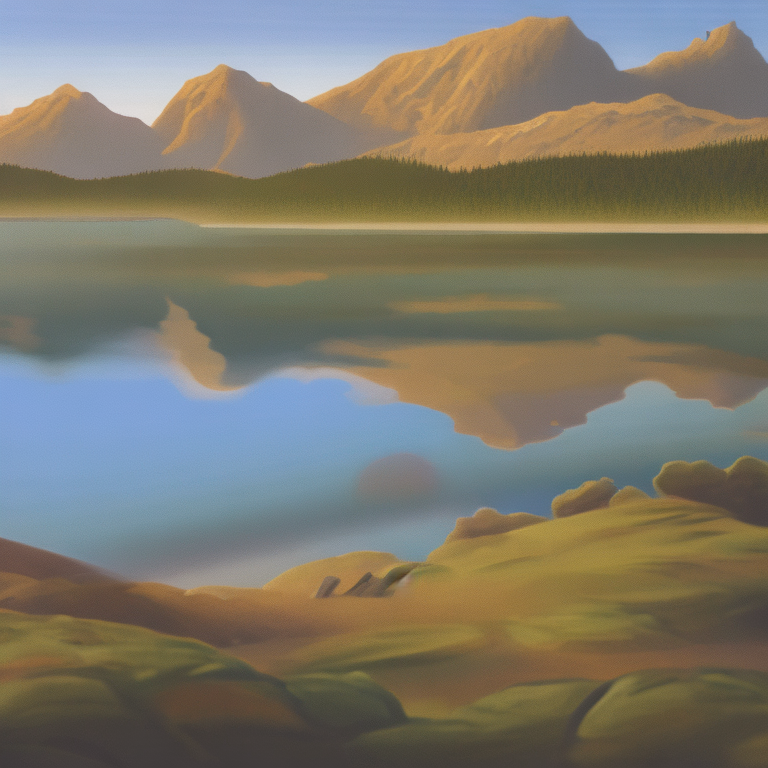

In [13]:
# # Step 7: Generate Text-to-Image Output
def generate_image(pipeline, prompt, save_path):
    print(f"Generating an image with the prompt: {prompt}")
    output = pipeline(prompt)
    image = output.images[0]
    image.save(save_path)
    print(f"Image saved at {save_path}")
    return image

prompt = "A serene lake surrounded by mountains during sunset, photorealistic"
save_path = "/content/drive/MyDrive/generated_image_1234.png"
image = generate_image(pipe, prompt, save_path)
image.show()
image

In [14]:
from diffusers import StableDiffusionImg2ImgPipeline
import torch
from PIL import Image

# Load the Image-to-Image pipeline
# device = "cuda" if torch.cuda.is_available() else "cpu"
img2img_model_name = "runwayml/stable-diffusion-v1-5"  # Replace with desired model
img2img_pipe = StableDiffusionImg2ImgPipeline.from_pretrained(img2img_model_name, torch_dtype=torch.float16).to(device)
print("Image-to-Image pipeline loaded successfully.")

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

Image-to-Image pipeline loaded successfully.


  0%|          | 0/37 [00:00<?, ?it/s]

Image-to-Image output saved at /content/drive/MyDrive/generated_image_img2img.png


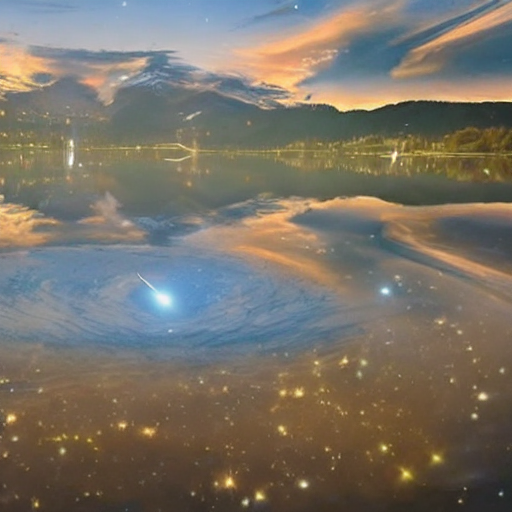

In [15]:
# Load and preprocess input image
input_image_path = "/content/drive/MyDrive/generated_image_1234.png"  # Replace with actual input image path
input_image = Image.open(input_image_path).convert("RGB").resize((512, 512))  # Ensure dimensions

# Generate an output image with slight modification
prompt_img2img = "Transform this image into a butiful lake on night and in the sky one person see the meteor shower."
strength = 0.75  # Controls the degree of modification (0 = original, 1 = full generation)
output_img2img = img2img_pipe(prompt=prompt_img2img, image=input_image, strength=strength)
generated_image = output_img2img.images[0]

# Save and display the generated image
img2img_output_path = "/content/drive/MyDrive/generated_image_img2img.png"
generated_image.save(img2img_output_path)
print(f"Image-to-Image output saved at {img2img_output_path}")
generated_image.show()
generated_image

In [16]:
from diffusers import StableDiffusionInpaintPipeline
import torch
from PIL import Image, ImageDraw

# Load the Inpainting pipeline
inpaint_model_name = "stabilityai/stable-diffusion-2-inpainting"#"stabilityai/stable-diffusion-2-inpainting"
inpaint_pipe = StableDiffusionInpaintPipeline.from_pretrained(inpaint_model_name, torch_dtype=torch.float16).to(device)
print("Inpainting pipeline loaded successfully.")

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

Inpainting pipeline loaded successfully.


  0%|          | 0/50 [00:00<?, ?it/s]

Inpainted image saved to /content/drive/MyDrive/inpainted_image_final.png


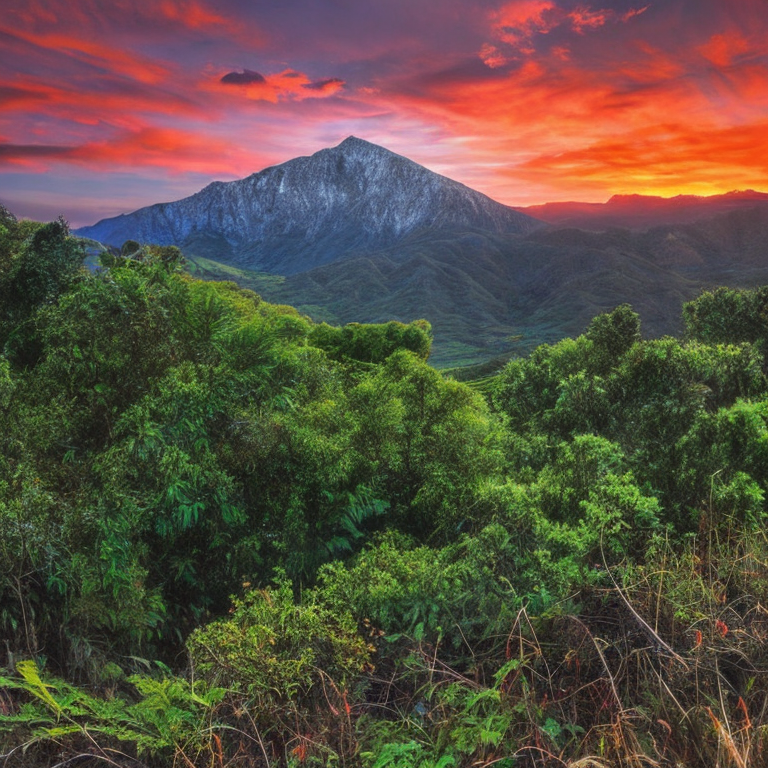

In [17]:
# Load and preprocess input image
input_image_path = "/content/drive/MyDrive/generated_image_img2img.png"  # Replace with the actual input image path
original_image = Image.open(input_image_path).convert("RGB")
image_resized = original_image.resize((512, 512))

# Create and preprocess mask
mask = Image.new("L", image_resized.size, 0)  # Black = Unchanged, White = Editable
draw = ImageDraw.Draw(mask)
draw.rectangle((150, 150, 350, 350), fill=255)  # Define the editable region

# Convert image and mask to compatible formats
image_resized = image_resized.convert("RGB")  # Ensure 3 channels
mask_resized = mask.convert("L")             # Ensure 1 channel

# Prompt for inpainting
prompt = "Fill the masked area with a vibrant sunset over a mountain."

# Perform inpainting
result = pipe(prompt=prompt, image=image_resized, mask_image=mask_resized)

# Save and display the output image
output_image = result.images[0]
output_path = "/content/drive/MyDrive/inpainted_image_final.png"
output_image.save(output_path)
print(f"Inpainted image saved to {output_path}")
output_image.show()
output_image

In [18]:
# !pip install adapters

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 283.7/283.7 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 88.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 92.3 MB/s eta 0:00:00
  Attempting uninstall: tokenizers
    Found existing installation: tokenizers 0.21.0
    Uninstalling tokenizers-0.21.0:
      Successfully uninstalled tokenizers-0.21.0
  Attempting uninstall: transformers
    Found existing installation: transformers 4.47.0
    Uninstalling transformers-4.47.0:
      Successfully uninstalled transformers-4.47.0


In [2]:
from diffusers import StableDiffusionPipeline, StableDiffusionAdapterPipeline
import torch

# Set device
device = "cuda" if torch.cuda.is_available() else "cpu"

# Step 1: Load the base model (Stable Diffusion)
try:
    print("Loading Stable Diffusion model...")
    model_name = "stabilityai/stable-diffusion-2-1"
    base_pipe = StableDiffusionPipeline.from_pretrained(model_name, torch_dtype=torch.float16).to(device)
    print("Stable Diffusion model loaded successfully.")
except Exception as e:
    print(f"Error loading Stable Diffusion model: {e}")
    raise

# Step 2: Load and integrate adapters
try:
    # Style Adapter
    print("Loading style adapter...")
    style_adapter_name = "stabilityai/style-adapter"
    style_adapter = StableDiffusionAdapterPipeline.from_pretrained(style_adapter_name, torch_dtype=torch.float16).to(device)
    print("Style adapter loaded successfully.")

    # Face Adapter
    print("Loading face adapter...")
    face_adapter_name = "stabilityai/face-adapter"
    face_adapter = StableDiffusionAdapterPipeline.from_pretrained(face_adapter_name, torch_dtype=torch.float16).to(device)
    print("Face adapter loaded successfully.")

    # Combine adapters with the base pipeline
    # (Assuming adapters are compatible with base pipeline)
    base_pipe = style_adapter.combine_with(base_pipe)
    base_pipe = face_adapter.combine_with(base_pipe)
    print("Adapters fused with the base model successfully.")

except Exception as e:
    print(f"Error loading or fusing adapters: {e}")
    print("Proceeding with base pipeline only.")

# Step 3: Generate images with adapter fusion
prompts = [
    "A surreal painting in Van Gogh style",
    "A photorealistic portrait of a young woman with intricate details",
]

for i, prompt in enumerate(prompts):
    print(f"Generating image for prompt: {prompt}")
    try:
        # Generate image
        output = base_pipe(prompt)
        image = output.images[0]

        # Save and display
        image_path = f"/content/drive/MyDrive/generated_image_adapter_{i}.png"
        image.save(image_path)
        print(f"Image saved at {image_path}")
        image.show()
        image
    except Exception as e:
        print(f"Error generating image for prompt '{prompt}': {e}")



Loading Stable Diffusion model...


Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

Couldn't connect to the Hub: 404 Client Error. (Request ID: Root=1-675cca76-3c7c86cd3f02cb8173b3c2a2;c4c85b9a-6777-4e5e-908e-b8d5cc97117e)

Repository Not Found for url: https://huggingface.co/api/models/stabilityai/style-adapter.
Please make sure you specified the correct `repo_id` and `repo_type`.
If you are trying to access a private or gated repo, make sure you are authenticated..
Will try to load from local cache.


Stable Diffusion model loaded successfully.
Loading style adapter...
Error loading or fusing adapters: Cannot load model stabilityai/style-adapter: model is not cached locally and an error occurred while trying to fetch metadata from the Hub. Please check out the root cause in the stacktrace above.
Proceeding with base pipeline only.
Generating image for prompt: A surreal painting in Van Gogh style


  0%|          | 0/50 [00:00<?, ?it/s]

Image saved at /content/drive/MyDrive/generated_image_adapter_0.png
Generating image for prompt: A photorealistic portrait of a young woman with intricate details


  0%|          | 0/50 [00:00<?, ?it/s]

Image saved at /content/drive/MyDrive/generated_image_adapter_1.png


In [3]:
# Step 3: Generate images with adapter fusion
prompts = [
    "A surreal painting in Van Gogh style",
    "A photorealistic portrait of a young woman with intricate details",
]

for i, prompt in enumerate(prompts):
    print(f"Generating image for prompt: {prompt}")
    try:
        # Generate image
        output = base_pipe(prompt)
        image = output.images[0]

        # Save and display
        image_path = f"/content/drive/MyDrive/generated_image_adapter_{i}.png"
        image.save(image_path)
        print(f"Image saved at {image_path}")
        image.show()
        image
    except Exception as e:
        print(f"Error generating image for prompt '{prompt}': {e}")

Generating image for prompt: A surreal painting in Van Gogh style


  0%|          | 0/50 [00:00<?, ?it/s]

Image saved at /content/drive/MyDrive/generated_image_adapter_0.png
Generating image for prompt: A photorealistic portrait of a young woman with intricate details


  0%|          | 0/50 [00:00<?, ?it/s]

Image saved at /content/drive/MyDrive/generated_image_adapter_1.png


In [ ]:

# from diffusers import StableDiffusionPipeline
# import torch
# from diffusers import StableDiffusionAdapterPipeline
# # Ensure the device is correctly set
# device = "cuda" if torch.cuda.is_available() else "cpu"

# # Step 7: Load Style Adapter and Combine with Stable Diffusion

# try:
#     print("Trying to load Stable Diffusion 3.5 (large)...")
#     model_name = "stabilityai/stable-diffusion-3.5-large"
#     pipe = StableDiffusionPipeline.from_pretrained(model_name, torch_dtype=torch.float16).to(device)
#     print("Stable Diffusion 3.5 (large) loaded successfully.")
# except Exception as e_large:
#     print(f"Error loading Stable Diffusion 3.5 (large): {e_large}")
#     print("Falling back to Stable Diffusion 2-1...")
#     model_name = "stabilityai/stable-diffusion-2-1"
#     pipe = StableDiffusionPipeline.from_pretrained(model_name, torch_dtype=torch.float16).to(device)
#     print("Stable Diffusion 2-1 loaded successfully.")

# # Step 2: Load Style Adapter and Combine with Base Model
# try:
#     adapter_name = "stabilityai/style-adapter"  # Update with the correct adapter name if available
#     print("Loading style adapter...")
#     adapter = StableDiffusionAdapterPipeline.from_pretrained(adapter_name, torch_dtype=torch.float16).to(device)
#     print("Style adapter loaded successfully.")

#     # Combine adapter with base model
#     pipe = adapter.combine_with(pipe)
#     print("Adapter fusion complete. Generating an image with the adapter applied...")

#     # Generate a stylized image
#     prompt_adapter = "A surreal painting in Van Gogh style"
#     output_adapter = pipe(prompt_adapter)
#     image_adapter = output_adapter.images[0]

#     # Save and display the stylized image
#     image_adapter_path = "/content/drive/MyDrive/generated_image_adapter.png"
#     image_adapter.save(image_adapter_path)
#     print(f"Image with adapter saved at {image_adapter_path}")
#     image_adapter.show()

# except Exception as e_adapter:
#     print(f"Adapter functionality could not be applied. Error: {e_adapter}")
#     print("Falling back to the base model without adapter.")

#     # Fallback: Generate a regular image
#     prompt = "A serene lake surrounded by mountains during sunset, photorealistic"
#     output = pipe(prompt)
#     image = output.images[0]

#     # Save and display the fallback image
#     image_path = "/content/drive/MyDrive/generated_image_fallback.png"
#     image.save(image_path)
#     print(f"Fallback image saved at {image_path}")
#     image.show()

In [ ]:
# Step 8: Load Quantized Model
print("Loading quantized model (nf4 format)...")
quantized_model_name = "stabilityai/stable-diffusion-3.5-quantized-nf4"
quantized_pipe = StableDiffusionPipeline.from_pretrained(quantized_model_name, torch_dtype=torch.float16).to(device)
print("Quantized model loaded successfully.")

In [ ]:
# Step 9: Inpainting for Background Replacement
from diffusers import StableDiffusionInpaintingPipeline
from PIL import Image

print("Loading inpainting model for background replacement...")
inpaint_model_name = "stabilityai/stable-diffusion-inpainting-3.5"
inpaint_pipe = StableDiffusionInpaintingPipeline.from_pretrained(inpaint_model_name, torch_dtype=torch.float16).to(device)
print("Inpainting model loaded successfully.")

# Input image and prompt
image_path = "/content/drive/MyDrive/input_image.jpg"  # Replace with your own image path
original_image = Image.open(image_path)
prompt_inpaint = "Replace the background with a vibrant galaxy scene"

# Generate inpainted result
result_inpaint = inpaint_pipe(prompt=prompt_inpaint, image=original_image)
inpaint_image = result_inpaint.images[0]

# Save and display the inpainted image
inpaint_image_path = "/content/drive/MyDrive/inpainted_image.png"
inpaint_image.save(inpaint_image_path)
print(f"Inpainted image saved at {inpaint_image_path}")
inpaint_image.show()

In [ ]:
# Step 10: Summary and Documentation
# Save findings in a Markdown cell or external document
print("Assignment completed. Ensure all deliverables are ready for submission.")
